# Machine Learning Practice

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.linear_model import LinearRegression

In [267]:
# Super simple dataset
wtloss = pd.read_csv('data/weight_loss.csv', index_col=0)
wtloss.head()

,Days,Weight
1,0,184.35
2,4,182.51
3,7,180.45
4,7,179.91
5,11,177.91


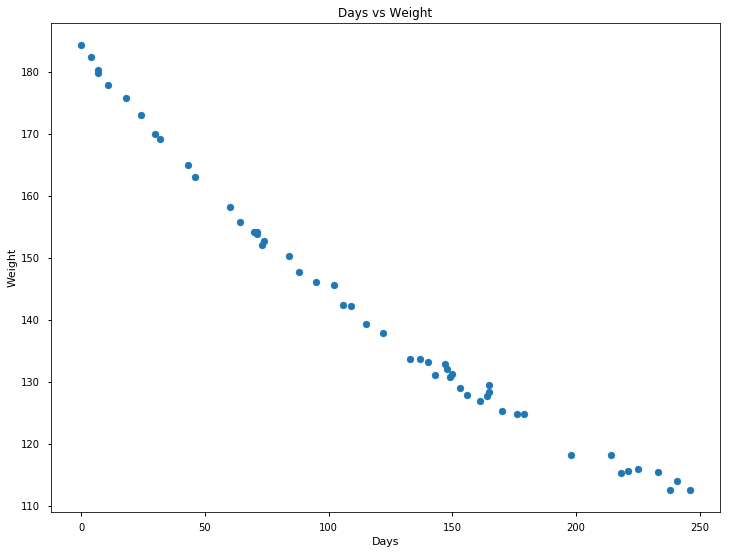

In [268]:
# This is also done in the previous notebook, but is replicated here
# Scatterplot
plt.figure(figsize=[12,9])
plt.scatter(wtloss['Days'], wtloss['Weight'])
plt.xlabel("Days")
plt.ylabel("Weight")
plt.title("Days vs Weight")
plt.show()

In [269]:
# fit a regression to the dataset
lm = LinearRegression()
days = np.array(wtloss['Days']).reshape(-1,1)
model = lm.fit(days, wtloss['Weight'])

# retrieve the slope and intercept of the line
# fit.coef_ returns an array - useful for when you have multiple features!
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.29073478]
Intercept: 176.89024447732777


Then the fitted line has the form:<br>
<b>Weight = -0.29 * Days + 176.89</b>

In [270]:
estimate = model.coef_[0] * days + model.intercept_

# R-squared and MSE are two of many metrics used to evaluate models
print("R-squared:", skl.metrics.r2_score(wtloss['Weight'], estimate))
print("Mean Squared Error (MSE):", skl.metrics.mean_squared_error(wtloss['Weight'], estimate))

R-squared: 0.9708453803588306
Mean Squared Error (MSE): 12.733468964822292


Higher R^2 is better, and has a maximum of 1. This means our model is pretty good, but this is a fairly simple problem.
Lower Mean Squared Error (MSE) is better, down to a minimum of 0. It is useful for comparing two models on the same dataset - our values are in the 110 to 180 range, so a MSE of 12.7 isn't bad.

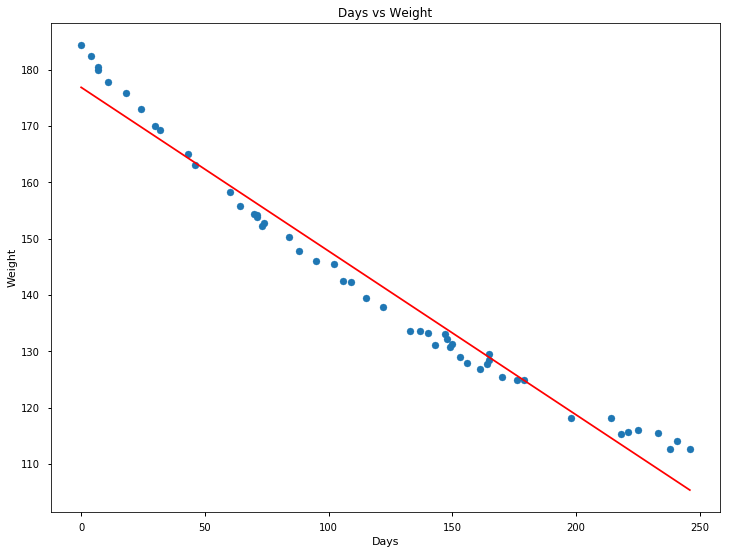

In [271]:
plt.figure(figsize=[12,9])

plt.scatter(wtloss['Days'], wtloss['Weight'])
plt.xlabel("Days")
plt.ylabel("Weight")
plt.title("Days vs Weight")

plt.plot(days, estimate, color="red")
plt.show()

Notice that the line is a pretty good fit, but on either end the actual data is above the line. <b>We can do better!</b>

In [272]:
log_days = np.square(days)

lm = LinearRegression()
x = np.concatenate((sq_days, days), axis=1)
model2 = lm.fit(x, wtloss['Weight'])

# retrieve the slope and intercept of the line
# fit.coef_ returns an array - useful for when you have multiple features!
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)

Coefficients: [ 0.00069295 -0.45654424]
Intercept: 183.33263164938927


Then the fitted line has the form:<br>
<b>Weight = -0.00069 * Days^2 - 0.457 * Days + 176.89</b>

In [273]:
estimate2 = 0.00069*sq_days - 0.457*days + 183.33

# R-squared and MSE are two of many metrics used to evaluate models
print("R-squared:", skl.metrics.r2_score(wtloss['Weight'], estimate2))
print("Mean Squared Error (MSE):", skl.metrics.mean_squared_error(wtloss['Weight'], estimate2))

R-squared: 0.998053803845266
Mean Squared Error (MSE): 0.8500137762307663


Compare this R^2 of <b>0.998</b> to <b>0.971</b>. Also compare the MSE of <b>0.85</b> to <b>12.73</b>. Now let's look at the plot to check how we did visually:

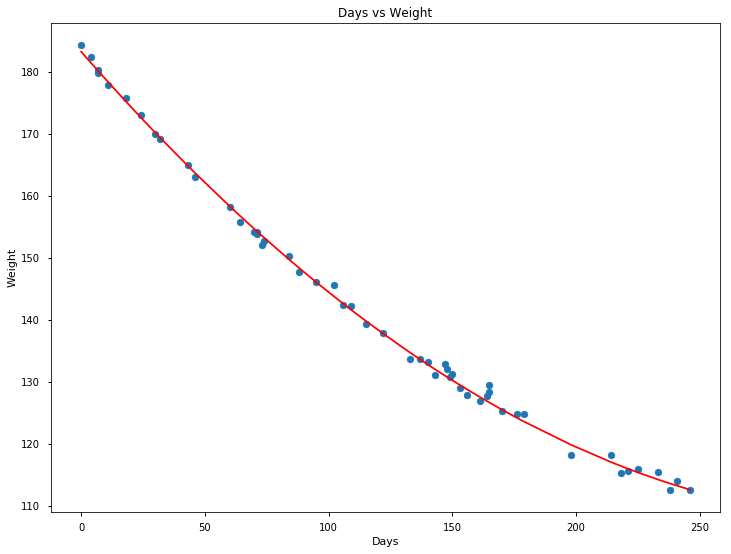

In [274]:
plt.figure(figsize=[12,9])

plt.scatter(wtloss['Days'], wtloss['Weight'])
plt.xlabel("Days")
plt.ylabel("Weight")
plt.title("Days vs Weight")

plt.plot(days, estimate2, color="red")
plt.show()

This fits the data much better!